In [13]:
DIR = '../../yolov5/runs/detect/best/labels'
DETECT_IMAGE_DIR = '../../yolov5/runs/detect/best'
IMAGE_DIR = '../../yolov5/trash_data/images/test'

In [14]:
import os

whole = os.listdir(IMAGE_DIR)

In [15]:
import copy
filename = []
res = []

for i in range(len(whole)):
    if 'checkpoints' in whole[i]:
        continue
    try:
        label_name = copy.deepcopy(whole[i])
        label_name = label_name.replace('.jpg', '.txt')
        f = open(DIR + '/' + label_name)
        line = f.readline()
        change = list(whole[i])
        change[-9] = '/'
        filename.append(''.join(change))
        predict = ''
        while line:
            line = map(float, line.rstrip().split())
            label, xc, yc, w, h, score = line
            w *= 512
            h *= 512
            x = xc * 512 - w / 2
            y = yc * 512 - h / 2
            predict += str(int(label)) + ' ' + str(score) + ' ' + str(x) + ' ' + str(
                    y) + ' ' + str(x + w) + ' ' + str(y + h) + ' '
            line = f.readline()
        res.append(predict)
    except:
        change = list(whole[i])
        change[-9] = '/'
        filename.append(''.join(change))
        res.append('')
        continue

In [16]:
import pandas as pd
submission = pd.read_csv('wbf4.csv')

temp = pd.DataFrame()
temp['image_id'] = submission['image_id']

asd = dict()

for name, data in zip(filename, res):
    asd[name] = data

fin = []
for i in temp['image_id']:
    fin.append(asd[i])
    
temp['PredictionString'] = fin

yolo = pd.DataFrame()
yolo['PredictionString'] = temp['PredictionString']
yolo['image_id'] = temp['image_id']

In [17]:
yolo.head()

,PredictionString,image_id
0,5 0.325684 394.0001024 364.999936 443.0000896 ...,batch_01_vt/0021.jpg
1,8 0.273926 81.000192 256.0 233.000192 444.0002...,batch_01_vt/0028.jpg
2,1 0.718262 68.00025599999998 168.0 376.0 379.9...,batch_01_vt/0031.jpg
3,2 0.322266 295.99974399999996 156.999679999999...,batch_01_vt/0032.jpg
4,6 0.251953 240.0 267.000064 387.99974399999996...,batch_01_vt/0070.jpg


In [18]:
yolo.to_csv('resize.csv', index = False)

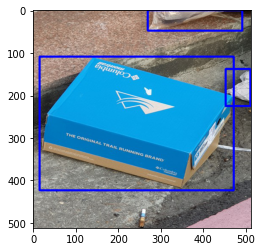

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import cv2

name = whole[100]
img = PIL.Image.open(IMAGE_DIR + '/' + name)
name = name.replace('.jpg', '.txt')
f = open(DIR + '/' + name)
line = f.readline()
data = []
while line:
    line = map(float, line.rstrip().split())
    label, xc, yc, w, h, score = line
    w *= 512
    h *= 512
    x = xc * 512 - w / 2
    y = yc * 512 - h / 2
    data.append([label, x, y, w, h, score])
#     w += x
#     h += y
#     predict += str(int(label)) + ' ' + str(score) + ' ' + str(x) + ' ' + str(
#             h) + ' ' + str(w) + ' ' + str(y) + ' '
    line = f.readline()
res.append(predict)

img = np.array(img)


for box in data:
    box = box[1:]
    x_min, y_min, w, h, _ = box
    cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_min + w), int(y_min + h)), (0,0,255), 3)

plt.imshow(img)
plt.show()